In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [ ]:
##drop month,day and yyear
df.drop(['day','month','year'],axis = 1 , inplace = True)

KeyError: "['day', 'month', 'year'] not found in axis"

In [ ]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
df['Classes'].value_counts()

Classes
fire             131
not fire          99
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [ ]:
## Encoding
df['Classes'] = np.where(df['Classes'].str.contains("not fire") , 0 , 1)

In [ ]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
236,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
237,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
238,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
239,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
240,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [ ]:
df['Classes'].value_counts()

Classes
1    137
0    104
Name: count, dtype: int64

In [ ]:
## Independent And dependent features
X=df.drop('FWI',axis=1)
y=df['FWI']

In [ ]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [ ]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
236    6.5
237    0.0
238    0.2
239    0.7
240    0.5
Name: FWI, Length: 241, dtype: float64

In [ ]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
X_train.shape,X_test.shape

((180, 11), (61, 11))

In [ ]:
## Feature Selection based on correlaltion
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.658884,-0.283527,-0.329838,0.695701,0.490708,0.368994,0.609129,0.461458,0.529054,0.254575
RH,-0.658884,1.000000,0.255366,0.218938,-0.636912,-0.383872,-0.201891,-0.687823,-0.330053,-0.429008,-0.388707
Ws,-0.283527,0.255366,1.000000,0.315301,-0.191422,-0.012974,0.078715,0.009717,0.020902,-0.088843,-0.199183
Rain,-0.329838,0.218938,0.315301,1.000000,-0.532895,-0.266456,-0.284452,-0.324347,-0.277710,-0.343453,-0.104973
FFMC,0.695701,-0.636912,-0.191422,-0.532895,1.000000,0.598514,0.504184,0.733343,0.584447,0.763900,0.266560
DMC,0.490708,-0.383872,-0.012974,-0.266456,0.598514,1.000000,0.878344,0.665321,0.984121,0.589805,0.207122
DC,0.368994,-0.201891,0.078715,-0.284452,0.504184,0.878344,1.000000,0.508745,0.947259,0.502396,-0.084035
ISI,0.609129,-0.687823,0.009717,-0.324347,0.733343,0.665321,0.508745,1.000000,0.628279,0.727029,0.282773
BUI,0.461458,-0.330053,0.020902,-0.277710,0.584447,0.984121,0.947259,0.628279,1.000000,0.578800,0.104204
Classes,0.529054,-0.429008,-0.088843,-0.343453,0.763900,0.589805,0.502396,0.727029,0.578800,1.000000,0.203781


<Axes: >

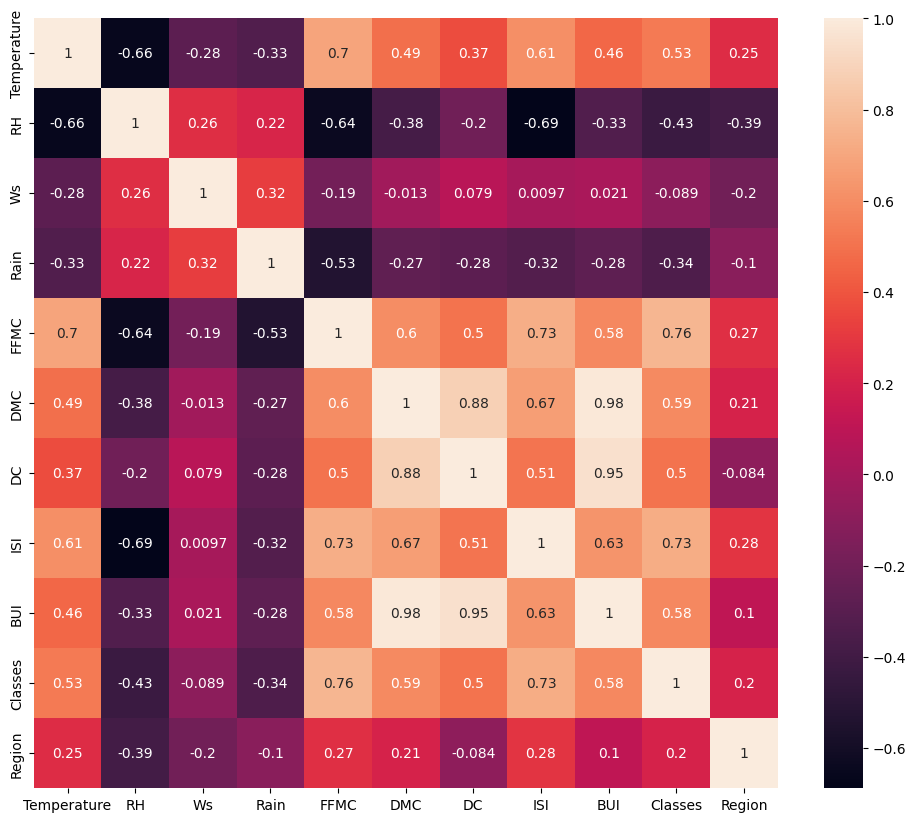

In [ ]:
## Check for multicollinearity
plt.figure(figsize = (12 , 10))
corr = X_train.corr()
sns.heatmap(corr , annot = True)

In [ ]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.658884,-0.283527,-0.329838,0.695701,0.490708,0.368994,0.609129,0.461458,0.529054,0.254575
RH,-0.658884,1.000000,0.255366,0.218938,-0.636912,-0.383872,-0.201891,-0.687823,-0.330053,-0.429008,-0.388707
Ws,-0.283527,0.255366,1.000000,0.315301,-0.191422,-0.012974,0.078715,0.009717,0.020902,-0.088843,-0.199183
Rain,-0.329838,0.218938,0.315301,1.000000,-0.532895,-0.266456,-0.284452,-0.324347,-0.277710,-0.343453,-0.104973
FFMC,0.695701,-0.636912,-0.191422,-0.532895,1.000000,0.598514,0.504184,0.733343,0.584447,0.763900,0.266560
DMC,0.490708,-0.383872,-0.012974,-0.266456,0.598514,1.000000,0.878344,0.665321,0.984121,0.589805,0.207122
DC,0.368994,-0.201891,0.078715,-0.284452,0.504184,0.878344,1.000000,0.508745,0.947259,0.502396,-0.084035
ISI,0.609129,-0.687823,0.009717,-0.324347,0.733343,0.665321,0.508745,1.000000,0.628279,0.727029,0.282773
BUI,0.461458,-0.330053,0.020902,-0.277710,0.584447,0.984121,0.947259,0.628279,1.000000,0.578800,0.104204
Classes,0.529054,-0.429008,-0.088843,-0.343453,0.763900,0.589805,0.502396,0.727029,0.578800,1.000000,0.203781


In [ ]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [ ]:
## threshold--Domain expertise
corr_features=correlation(X_train,0.85)

In [ ]:
corr_features

{'BUI', 'DC'}

In [ ]:
## drop features when correlation is more than 0.85
X_train.drop(corr_features , axis = 1 , inplace = True)
X_test.drop(corr_features , axis = 1 , inplace = True)
X_train.shape , X_test.shape

((180, 9), (61, 9))

# ***Feature Scaling Or Standardization***

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[-0.82582663,  0.76875417,  1.25919129, ..., -0.62417554,
        -1.11803399, -0.97801929],
       [-0.03373714, -0.48680422, -0.57458243, ...,  0.06950049,
         0.89442719,  1.02247472],
       [ 2.07850149, -2.07277271, -0.20782769, ...,  2.84420462,
         0.89442719,  1.02247472],
       ...,
       [-1.88194595,  0.90091821,  0.5256818 , ..., -1.07865294,
        -1.11803399, -0.97801929],
       [ 1.286412  , -0.48680422, -0.20782769, ...,  0.85885598,
         0.89442719,  1.02247472],
       [-0.5617968 ,  0.96700023,  1.99270077, ..., -0.86337417,
        -1.11803399, -0.97801929]])

# ***Box Plots To understand Effect Of Standard Scaler***

<ipython-input-32-41fb1d7ced73>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'X_train After Scaling')

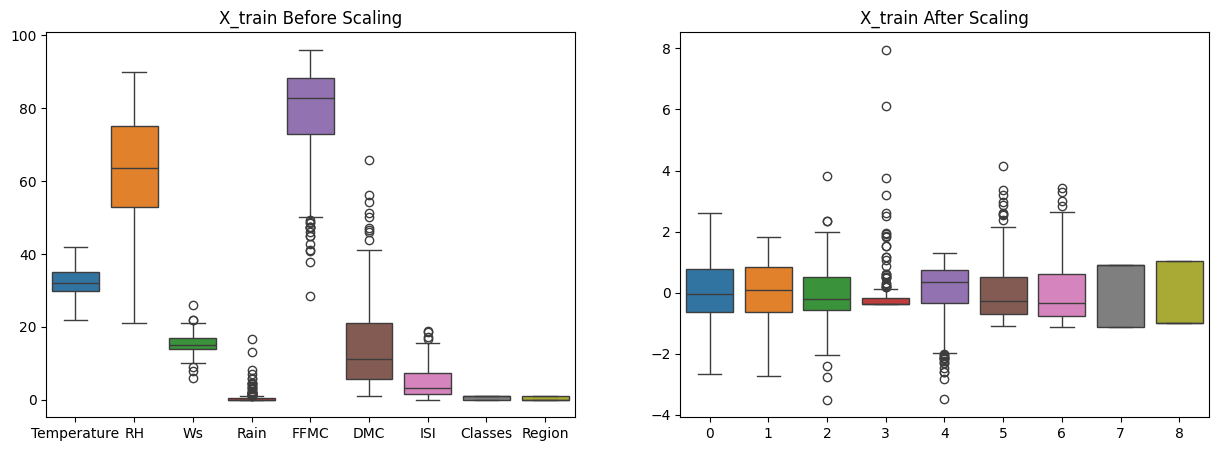

In [ ]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

# ***Linear Regression Model***

Mean absolute error 0.6612623700751267
R2 Score 0.9836843464471654


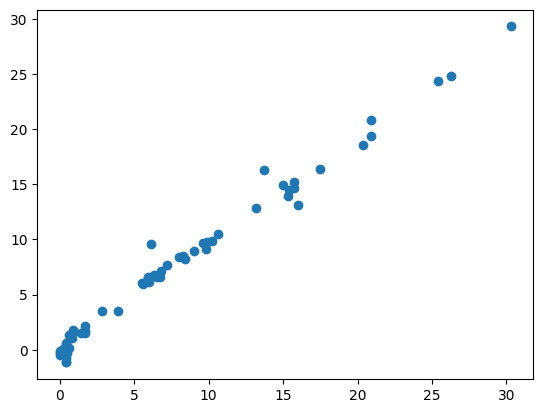

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

linreg = LinearRegression()

linreg.fit(X_train_scaled , y_train)
y_pred = linreg.predict(X_test_scaled)

mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print("Mean absolute error", mae)
print("R2 Score", score)

plt.scatter(y_test,y_pred)

# *Lasso Regression*#

MAE =  1.2522655115292307
R2 =  0.9473075426805143


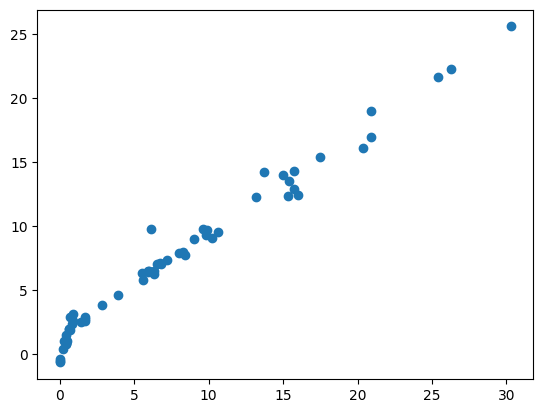

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score

lasso = Lasso()

lasso.fit(X_train_scaled , y_train)

y_pred = lasso.predict(X_test_scaled)

mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("MAE = ", mae)
print("R2 = ", score)
plt.scatter(y_test,y_pred)



# ***Cross Validation Lasso***
for a dataset, the division is done in **train and test**

the train data is further divided into ***train and validation***

the train data is specifically used for training
validation is done for hyperparameter tuning

eg. for a dataset of 1000 datapoints, with cv = 5, the 1000/5 = 200 datapoints will be used for validation for each cv

1.   first 800 records will be used for training and next 200 records will be used for validation, cv = 1
2.   second 800 records will be used for training and next 200 records will be used for validation, cv = 2
3. third 800 records will be used for training and next 200 records will be used for validation, cv = 3
4. fourth 800 records will be used for training and next 200 records will be used for validation, cv = 4
5. fifth 800 records will be used for training and next 200 records will be used for validation, cv = 5








In [ ]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv = 5)
lassocv.fit(X_train_scaled , y_train)

LassoCV(cv=5)

MAE =  0.6948520208585799
R2 Score =  0.9828599317980785


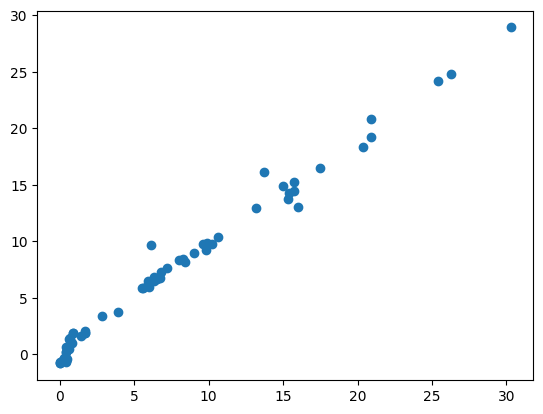

In [ ]:
y_pred = lassocv.predict(X_test_scaled)
plt.scatter(y_test , y_pred)
mae = mean_absolute_error(y_test , y_pred)
score = r2_score(y_test , y_pred)
print("MAE = " , mae)
print("R2 Score = " , score)

# ***Ridge Regression model***

Mean absolute error 0.6864171979933389
R2 Score 0.9830258655702742


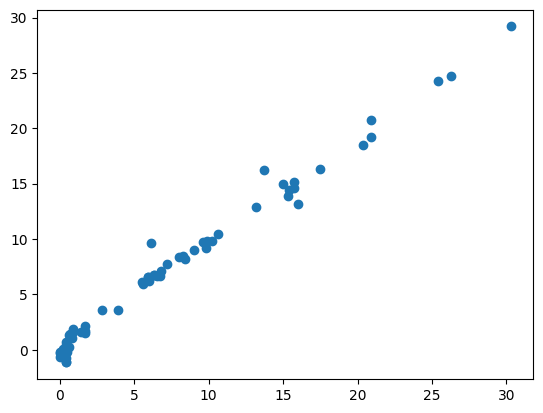

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score

ridge = Ridge()
ridge.fit(X_train_scaled , y_train)

y_pred = ridge.predict(X_test_scaled)

mae = mean_absolute_error(y_test , y_pred)
score = r2_score(y_test , y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

plt.scatter(y_test , y_pred)

# ***Ridge CV***

Mean absolute error 0.8884598931635311
R2 Score 0.9756362083772786


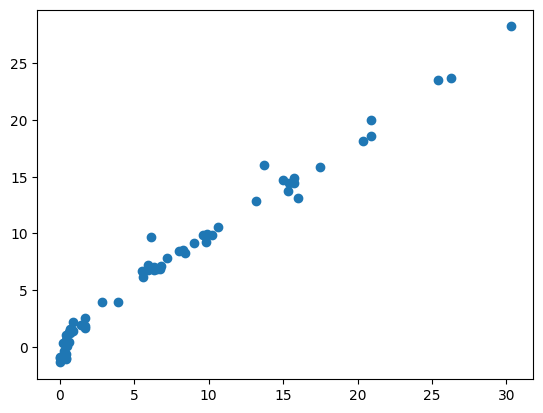

In [ ]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv = 5)

ridgecv.fit(X_train_scaled , y_train)
y_pred = ridgecv.predict(X_test_scaled)
plt.scatter(y_test , y_pred)
mae = mean_absolute_error(y_test , y_pred)
score = r2_score(y_test , y_pred)
print("Mean absolute error" , mae)
print("R2 Score", score)

In [ ]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

# ***Elasticnet Regression***

Mean absolute error 1.924851265262548
R2 Score 0.8823512748789929


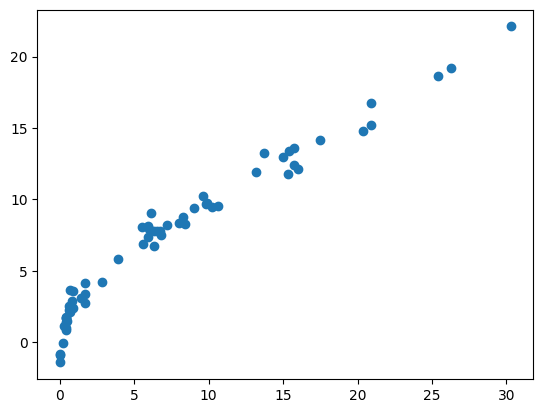

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, r2_score

elastic = ElasticNet()

elastic.fit(X_train_scaled , y_train)

y_pred = elastic.predict(X_test_scaled)

mae = mean_absolute_error(y_test , y_pred)
score = r2_score(y_test , y_pred)
print("Mean absolute error" , mae)
print("R2 Score", score)

plt.scatter(y_test , y_pred)

# ***ElasticNet CV***

Mean absolute error 0.7523532380645858
R2 Score 0.9811284001563361


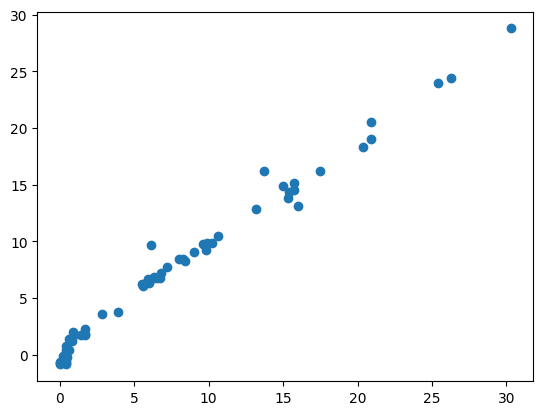

In [ ]:
from sklearn.linear_model import ElasticNetCV

elasticcv = ElasticNetCV(cv = 5)

elasticcv.fit(X_train_scaled , y_train)

y_pred = elasticcv.predict(X_test_scaled)

plt.scatter(y_test , y_pred)

mae = mean_absolute_error(y_test , y_pred)
score = r2_score(y_test , y_pred)
print("Mean absolute error" ,  mae)
print("R2 Score", score)

In [ ]:
elasticcv.alphas_

array([13.52679383, 12.6151332 , 11.76491544, 10.97199952, 10.23252347,
        9.54288564,  8.89972709,  8.29991527,  7.74052876,  7.21884302,
        6.73231717,  6.27858152,  5.85542614,  5.46079002,  5.09275104,
        4.74951667,  4.42941514,  4.13088739,  3.8524794 ,  3.59283518,
        3.35069012,  3.12486482,  2.91425939,  2.71784806,  2.5346742 ,
        2.36384564,  2.20453035,  2.05595239,  1.91738808,  1.78816254,
        1.66764637,  1.55525258,  1.45043376,  1.35267938,  1.26151332,
        1.17649154,  1.09719995,  1.02325235,  0.95428856,  0.88997271,
        0.82999153,  0.77405288,  0.7218843 ,  0.67323172,  0.62785815,
        0.58554261,  0.546079  ,  0.5092751 ,  0.47495167,  0.44294151,
        0.41308874,  0.38524794,  0.35928352,  0.33506901,  0.31248648,
        0.29142594,  0.27178481,  0.25346742,  0.23638456,  0.22045304,
        0.20559524,  0.19173881,  0.17881625,  0.16676464,  0.15552526,
        0.14504338,  0.13526794,  0.12615133,  0.11764915,  0.10

# ***Pickling***

In [1]:
import pickle
from flask import Flask , request , jsonify , render_template
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [ ]:
pickle.dump(scaler, open('scaling.pkl', 'wb'))
pickle.dump(ridge, open('ridge.pkl', 'wb'))